# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


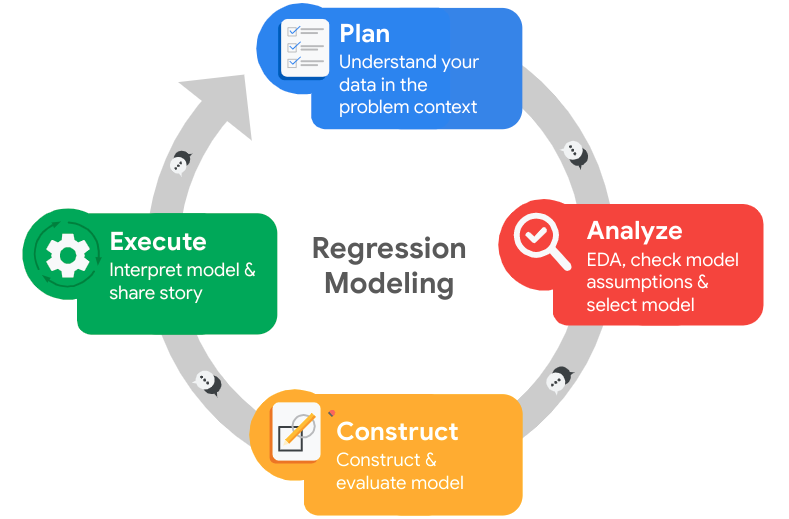

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### The decriptive statistics provide the following summary for the survey data;
- Satisfaction_level: The minimum satisfaction level was 0.09 and maximum was 1. The 5oth percentile shows that about half of the employess have low satisfaction levels.
- The standard deviation of all the variables are high when compared to the mean, it shows that the values are spread out from the mean.
- time_spend_company: shows that employees spent a minimum of 2yrs and maximum of 10yrs with the company.
- number_project: minimum number of projects by employees is 2 and maximum is 7.
- The max values when compared with the 75th percentile shows no sign of outliers as their values are close to the values of the 75th percentile.
- work_accident: the percentiles are 0 showing that some employees have not left the company.
- promotion_last_5yrs: the percentile values are all 0 showing that some employees have not received promotions in the past 5yrs.

In [8]:
df0[['salary', 'Department']].describe()

,salary,Department
count,14999,14999
unique,3,10
top,low,sales
freq,7316,4140


- salary: there are 3 unique salary levels in the company, majority (almost half) of employees are earning low salary. Is salary level a major determinant in employee satisfaction?
- Department: there are 10 unique departemnet in the company and majority of employees are in the sales department.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [10]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [3]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident', 'time_spend_company': 'time_spent', 'Department': 'department', 'average_montly_hours': 'average_monthly_hours'})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [4]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spent               0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

- There are no missing values in the dataset

### Check duplicates

Check for any duplicate entries in the data.

In [5]:
# Check for duplicates
df0.duplicated().sum()


3008

- Python reports 3008 duplicate rows in the data

In [6]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated(keep=False)]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.shape

(11991, 10)

In [9]:
df.duplicated().sum()

0

### Check outliers

Check for outliers in the data.

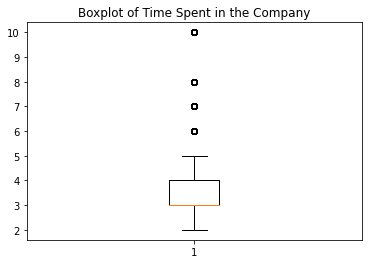

In [10]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
import matplotlib.pyplot as plt

plt.boxplot(df['time_spent'])
plt.title('Boxplot of Time Spent in the Company')
plt.show()

- the boxplot above shows that the avearge time spent by employees in the company is 3 yrs. It shows the presence of outliers.These outliers will be overlooked for the purpose of this analysis.

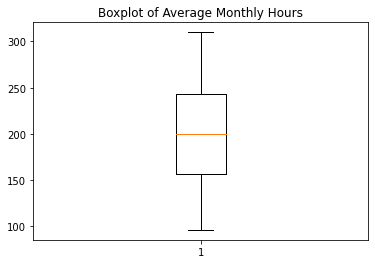

In [11]:
# Create a boxplot to visualize distribution of `average monthly hours` and detect any outliers

plt.boxplot(df['average_monthly_hours'])
plt.title('Boxplot of Average Monthly Hours')
plt.show()

- The boxplot shows that there are no outliers in average monthly hours.

In [ ]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###



Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [12]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())

print()

# Get percentages of people who left vs. stayed
print(df['left'].value_counts(normalize=True))


0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


- approximately 17% of employees have left the company.

In [14]:
# Show the number of employees in each department
df['department'].value_counts(normalize=True)



sales          0.270119
technical      0.187140
support        0.151864
IT             0.081394
RandD          0.057877
product_mng    0.057210
marketing      0.056125
accounting     0.051789
hr             0.050121
management     0.036361
Name: department, dtype: float64

- Sales department, technical and support departments hold a majority of employees.

In [17]:
df['salary'].value_counts(normalize=True)

low       0.478692
medium    0.438746
high      0.082562
Name: salary, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [5]:
import matplotlib.pyplot as plt

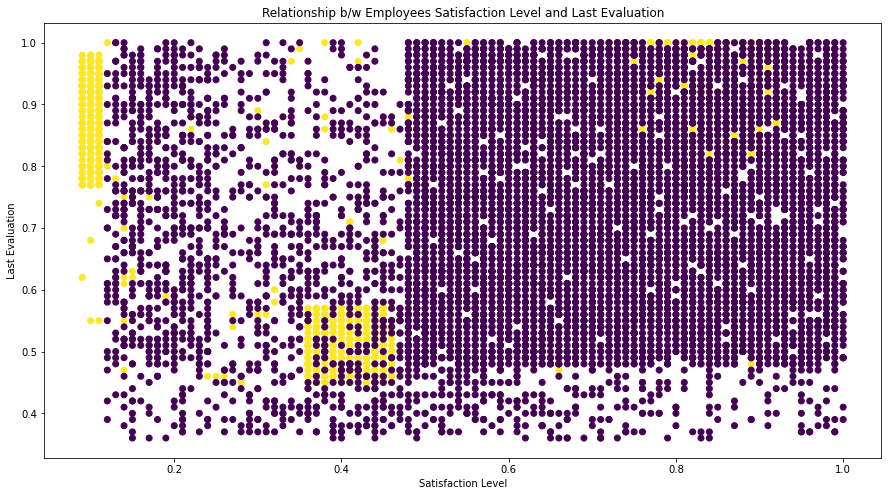

In [30]:
# Create a scatterplot of satisfaction_level and last_evaluation

plt.figure(figsize=(15,8))
plt.scatter(df['satisfaction_level'], df['last_evaluation'], c=df['left'])
plt.title('Relationship b/w Employees Satisfaction Level and Last Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()


- The scatterplot above shows 3 groups of employees who left. The first group had very low satisfaction rating of less than 0.2, but had high evaluations rates of ~0.78- 0.98. This set of employees were performing well at work but were not satisfied with work and still left. Maybe due to high workload or working hours.
- The second group of employees had low satisfaction rates of ~0.38-0.49, they were also not performing very well at work as their last evaluation was low, ~0.45-0.58. They may have left due to any factor, one being their poor work performance, they may have being laid off, or left maybe because they were not getting the experience or exposure they needed in the work environment.
- The third group of employees who left had very high satisfaction level ranging from ~0.7-0.9, they were also performing very well at work with evaluations of ~0.8-1.

In [23]:
df[['satisfaction_level', 'last_evaluation']].corr()

,satisfaction_level,last_evaluation
satisfaction_level,1.000000,0.095186
last_evaluation,0.095186,1.000000


- The scatterplot above and correlation test result of 0.095186 shows a positive relationship,  that is not statistically significant.

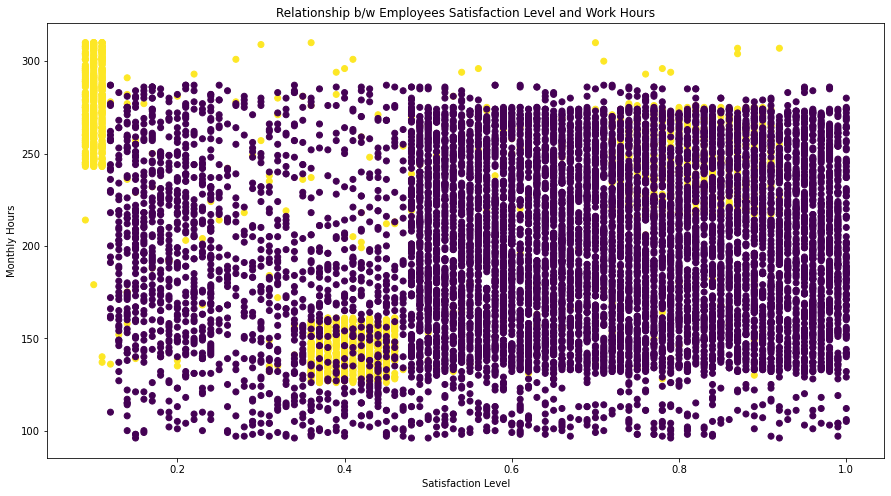

In [28]:
# Create a scatterplot of satisfaction_level and average_monthly_hours

plt.figure(figsize=(15,8))
plt.scatter(df['satisfaction_level'], df['average_monthly_hours'], c= df['left'])
plt.title('Relationship b/w Employees Satisfaction Level and Work Hours')
plt.xlabel('Satisfaction Level')
plt.ylabel('Monthly Hours')
plt.show()

- The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

- The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

- Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.

In [25]:
df[['satisfaction_level', 'average_monthly_hours']].corr()

,satisfaction_level,average_monthly_hours
satisfaction_level,1.000000,-0.006252
average_monthly_hours,-0.006252,1.000000


- The correlation result of -0.006252 shows a negative relationship between work hours and employee satisfaction. However, the scatterplot and correlation results shows that the relationship is not statistically significant.

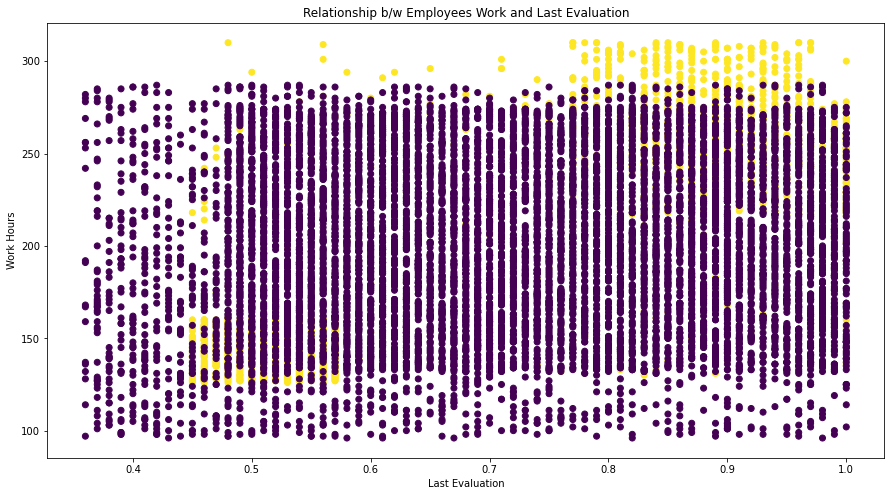

In [10]:
# Create a scatterplot of work hours and last_evaluation

plt.figure(figsize=(15,8))
plt.scatter(df['last_evaluation'], df['average_monthly_hours'], c=df['left'])
plt.title('Relationship b/w Employees Work and Last Evaluation')
plt.xlabel('Last Evaluation')
plt.ylabel('Work Hours')
plt.show()


- The scatterplot above shows 2 major set of employees who left, the first set of employees had low evaluation of ~0.45-0.58, and also had few work hours of less than ~160. Again these employees may have left due to poor performance at work.
- The 2nd set of employees who left account for majority of employees who left, they had high evaluation scores of ~0.8-1 and had high work hours of  220 and above. These employees may have left due to the plenty work load. The plot shows that majority of employees who left worked many hours.

In [11]:
df[['average_monthly_hours', 'last_evaluation']].corr()

,average_monthly_hours,last_evaluation
average_monthly_hours,1.000000,0.264678
last_evaluation,0.264678,1.000000


- The correlation result shows a weak positive relationship between avearge monthly hours and last evaluation.

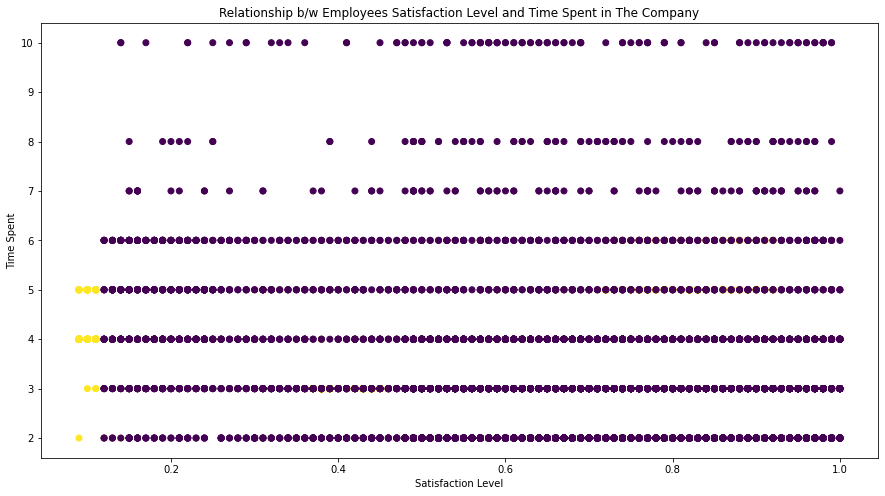

In [31]:
# Create a scatterplot of satisfaction_level and time_spent

plt.figure(figsize=(15,8))
plt.scatter(df['satisfaction_level'], df['time_spent'], c=df['left'])
plt.title('Relationship b/w Employees Satisfaction Level and Time Spent in The Company')
plt.xlabel('Satisfaction Level')
plt.ylabel('Time Spent')
plt.show()

- The scatterplot above shows that employees who left spent ~2-5 years in the company and had very low satisfaction level of less than ~0.1.

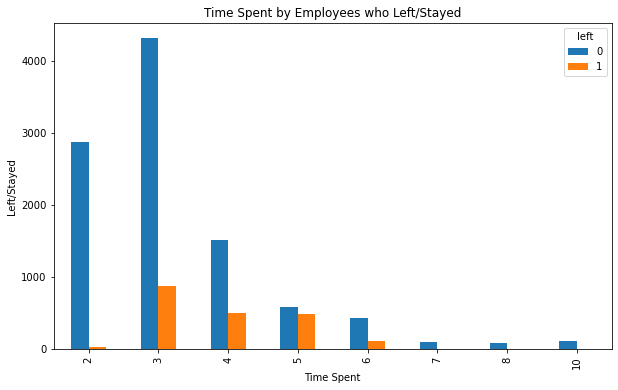

In [32]:
df.groupby('time_spent')['left'].value_counts().unstack().plot.bar(figsize=(10,6))

plt.xlabel("Time Spent")
plt.ylabel("Left/Stayed")
plt.title("Time Spent by Employees who Left/Stayed")
plt.show()
plt.close()

-  Majority of employees who left the company had spent ~3-6 years in the company. The previous scatterplot showed that these employees were also dissatusfied with work. None of the employees who stayed for more than 7years left the company.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

In [6]:
# Categorize satisfaction level and compare against departments.
#Categorize satisfaction level into 3 bins
bins = [0, 0.4, 0.7, 1]
labels = ['Poor', 'Okay', 'Best']
df['satisfaction_level_group'] = pd.cut(df['satisfaction_level'], bins=bins, labels=labels, right=False)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent,work_accident,left,promotion_last_5years,department,salary,satisfaction_level_group
0,0.38,0.53,2,157,3,0,1,0,sales,low,Poor
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Best
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Poor
3,0.72,0.87,5,223,5,0,1,0,sales,low,Best
4,0.37,0.52,2,159,3,0,1,0,sales,low,Poor


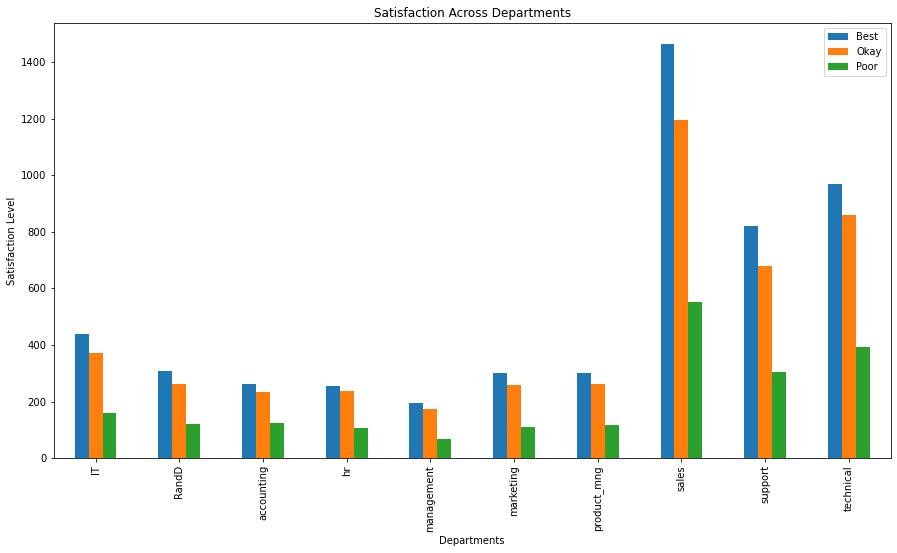

In [18]:
#review satisfaction level across departments
df.groupby('department')['satisfaction_level_group'].value_counts().unstack().plot.bar(figsize=(15,8))

plt.xlabel("Departments")
plt.ylabel("Satisfaction Level")
plt.title("Satisfaction Across Departments")
plt.show()
plt.close()

- The bar chart above shows that employees have similar satisfaction level across the departments. So departments may not be a strong determinant of employee satisfaction.

- https://stackoverflow.com/questions/57618570/how-to-turn-groupby-and-value-counts-into-multiple-pie-bar-charts

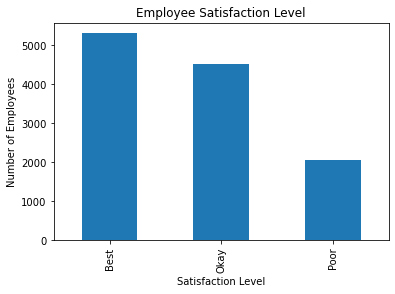

In [21]:
df.satisfaction_level_group.value_counts().plot.bar()

plt.title('Employee Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Employees')
plt.show()

- The chart shows that a good number of employees gave good ratings for work satisfaction. 
#### Note
- Poor: 0 - 0.4
- Okay: 0.4 - 0.7
- Best: 0.7 - 1

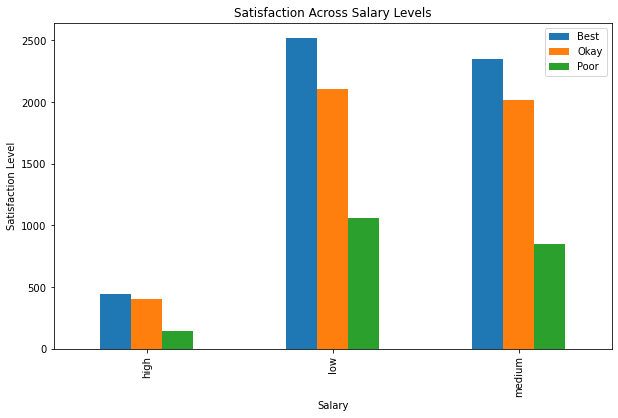

In [31]:
# Compare satisfaction level groups against salary
df.groupby('salary')['satisfaction_level_group'].value_counts().unstack().plot.bar(figsize=(10,6))

plt.xlabel("Salary")
plt.ylabel("Satisfaction Level")
plt.title("Satisfaction Across Salary Levels")
plt.show()
plt.close()

- It appears that employee satisfaction is also similar despite the salary level.

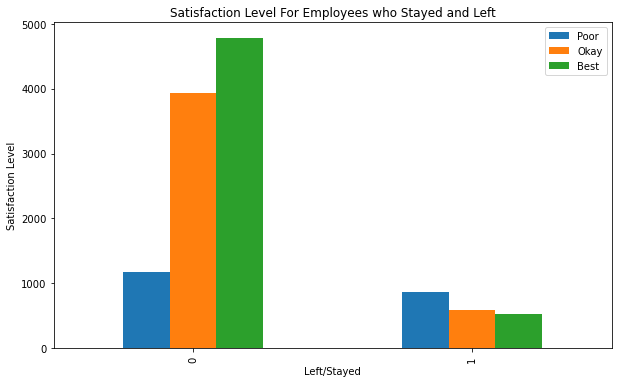

In [7]:
# Create a plot showing satisfaction level for left column

df.groupby('left')['satisfaction_level_group'].value_counts().unstack().plot.bar(figsize=(10,6))

plt.xlabel("Left/Stayed")
plt.ylabel("Satisfaction Level")
plt.title("Satisfaction Level For Employees who Stayed and Left")
plt.show()
plt.close()

- The bar chart above shows that employee satisfaction rating may be an important determinant of employees leaving or staying. Many employees who left gave a poor satisfaction rating. Employees who stayed gave good satisfaction rating.

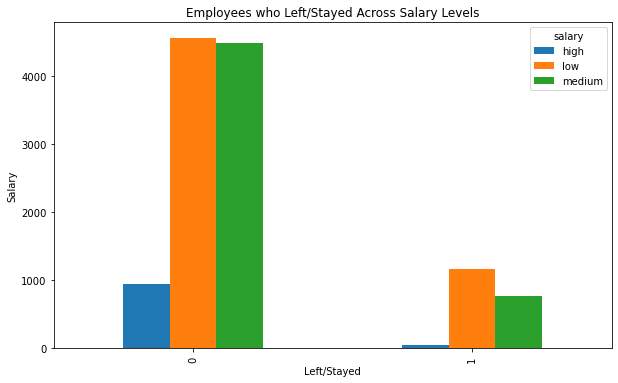

In [10]:
# Create a plot showing left column and salary
df.groupby('left')['salary'].value_counts().unstack().plot.bar(figsize=(10,6))

plt.xlabel("Left/Stayed")
plt.ylabel("Salary")
plt.title("Employees who Left/Stayed Across Salary Levels")
plt.show()
plt.close()

- Salary may also be a strong determining factor of employees staying or leaving.

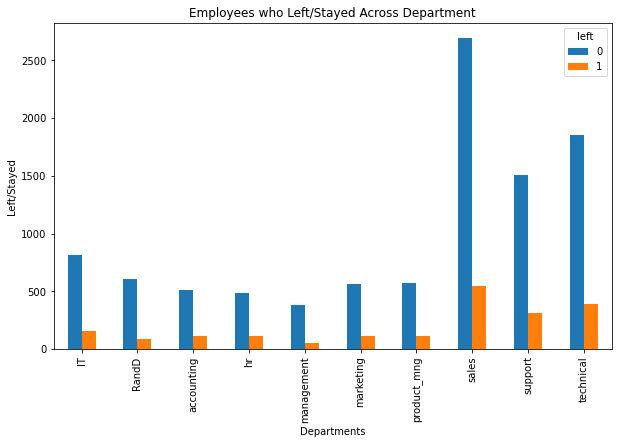

In [6]:
# Create a plot showing left and department

df.groupby('department')['left'].value_counts().unstack().plot.bar(figsize=(10,6))

plt.xlabel("Departments")
plt.ylabel("Left/Stayed")
plt.title("Employees who Left/Stayed Across Department")
plt.show()
plt.close()

- Department does not seem to be a strong determinant of employees staying or leaving.

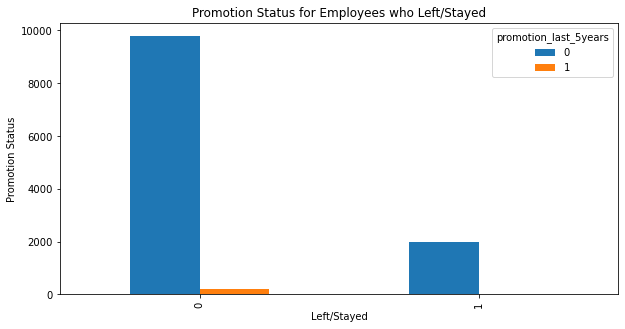

In [23]:
# Create a plot showing promotion and left

df.groupby('left')['promotion_last_5years'].value_counts().unstack().plot.bar(figsize=(10,5))

plt.xlabel("Left/Stayed")
plt.ylabel("Promotion Status")
plt.title("Promotion Status for Employees who Left/Stayed")
plt.show()



- The bar chart shows that a good majority of employees have not been promoted in the past 5years, also the majority of employees who left the company were not promoted.

In [24]:
pd.crosstab(df.left, df.promotion_last_5years)

promotion_last_5years,0,1
left,,
0,9805,195
1,1983,8


- The contigency table above shows that 1983 employees who left were not promoted.

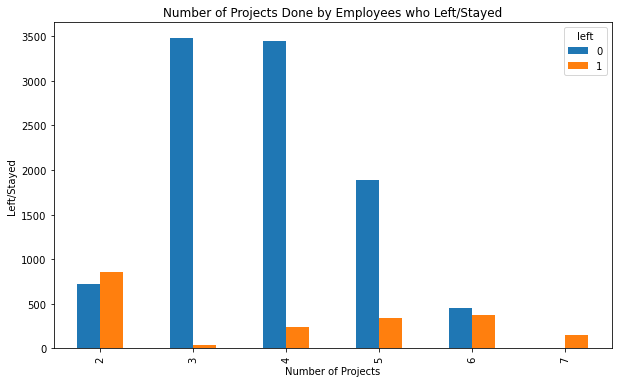

In [7]:
# Create plot showing left and number_project

df.groupby('number_project')['left'].value_counts().unstack().plot.bar(figsize=(10,6))

plt.xlabel("Number of Projects")
plt.ylabel("Left/Stayed")
plt.title("Number of Projects Done by Employees who Left/Stayed")
plt.show()
plt.close()

- The bar chart above shows that many employees who left had a project load of 4 and above. These employees may have felt pressured by the workload and left. The chart also shows that none of the employees with 7 project load stayed.
- Also many employees with project load of 2 left as well. This may be due to the fact that they were not satisfied with the work or were not performing well enough to be given more projects to handle.
- The number of projects may be a strong determinant of employees staying or leaving.

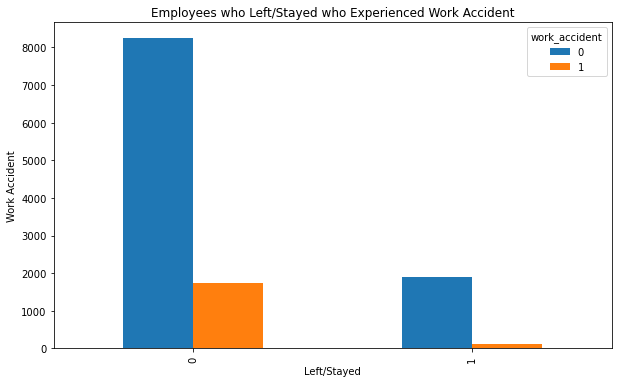

In [8]:
# Create plot showing lef6 and work accidents.

df.groupby('left')['work_accident'].value_counts().unstack().plot.bar(figsize=(10,6))

plt.xlabel("Left/Stayed")
plt.ylabel("Work Accident")
plt.title("Employees who Left/Stayed who Experienced Work Accident")
plt.show()
plt.close()

- The bar chart above shows work accident may not be a strong determinant of employees leaving.

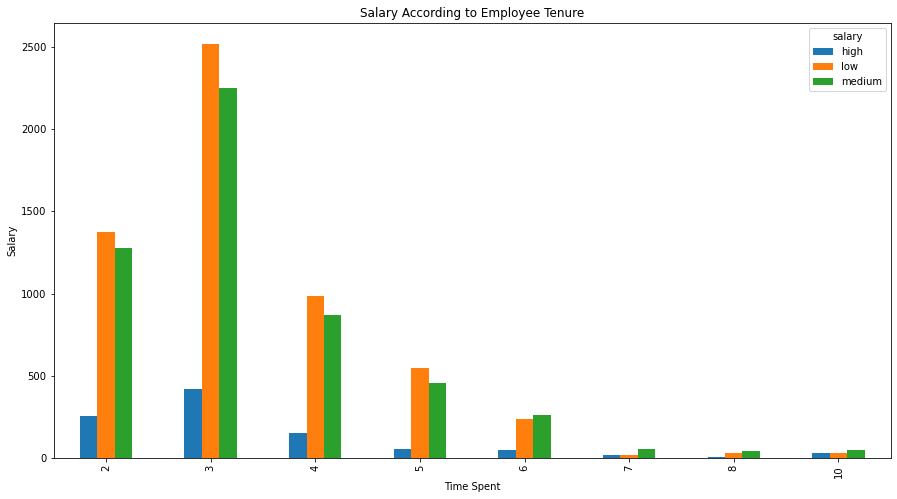

In [13]:
# Create plot showing salary and time spent

df.groupby('time_spent')['salary'].value_counts().unstack().plot.bar(figsize=(15,8))

plt.xlabel("Time Spent")
plt.ylabel("Salary")
plt.title("Salary According to Employee Tenure")
plt.show()
plt.close()

- The salary level distribution seems to be similar for employees who have worked for 2-5 years.
- The salary level distribution however becomes different for employees who have worked for 6years and above. The plot shows increase in employees earning high salary as the tenure increases and decraese in employees earning low salary.
- Recall that a previous plot showed that majority of employees who left spent 6years or less in the company. And many employees who left were paid low salary

### Insights

**The various visualizations provided great insight into some possible reasons for employees leaving, some of which include;**
- Employees dissatisfaction with work. Employee satisfaction was negatively correlated with work hours. Employee satisfaction ratings was similar across salary levels and departments.
- Employees with very high work hours and plenty work projects.
- Employees who are paid low salaries.
- Employees who had not received promotion in the past 5yrs.
- In summary employee were dissatisfied with work load and may have left due to this and salary.

**Also, employees leaving did not seem to be as a result of work accidents or being in a particular department. Employees satisfaction level and leaving rate was equally distributed across departments.**

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

- The model to be built will be predicting a categorical variable. Thus it will be a classisfication task as the variable to be predicted 'left' indicates whether an employee left(1) or stayed(0).

### Identify the types of models most appropriate for this task.

- Given that the prediction task is classification, a logistic regression model would be suitable in predicting the dependent variable.

### Modeling


In [23]:
# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [24]:
import seaborn as sns

In [9]:
import statsmodels.api as sm

### Convert Categorical Columns into Numeric Using One Hot Encoding

In [10]:
# Convert salary column to numeric
df['salary'] = OneHotEncoder(drop='first').fit_transform(df[['salary']]).toarray()

In [11]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent,work_accident,left,promotion_last_5years,department,salary,satisfaction_level_group
0,0.38,0.53,2,157,3,0,1,0,sales,1.0,Poor
1,0.80,0.86,5,262,6,0,1,0,sales,0.0,Best
2,0.11,0.88,7,272,4,0,1,0,sales,0.0,Poor
3,0.72,0.87,5,223,5,0,1,0,sales,1.0,Best
4,0.37,0.52,2,159,3,0,1,0,sales,1.0,Poor
5,0.41,0.50,2,153,3,0,1,0,sales,1.0,Okay
6,0.10,0.77,6,247,4,0,1,0,sales,1.0,Poor
7,0.92,0.85,5,259,5,0,1,0,sales,1.0,Best
8,0.89,1.00,5,224,5,0,1,0,sales,1.0,Best
9,0.42,0.53,2,142,3,0,1,0,sales,1.0,Okay


### Check logistic regression assumptions are met

- Outcome variable is categorical: Yes the outcome variable 'left' is categorical.
- Observations are independent of each other: since it was a independent survey from different employ
- No severe multicollinearity among X variables: The scatter plot and correlation test of average monthly hours and satisfaction level shows nor statistically significant correlation between the two variables. Also, salary is a categorical variable and thus cannot have correlated with either satisfaction level or average monthly hours.
- No extreme outliers: no extreme outliers was detected in the variables being used.
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size: Yes

### Create Training and Test Data

In [12]:
### Assign the X and y variables
X = df[['salary', 'average_monthly_hours', 'satisfaction_level']]
y = df['left']

### Split the data, 70% to train and 30% to test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### Fit a LogisticRegression model to the data

- Build a logistic regression model and fit it to the data using statsmodel.api
- https://realpython.com/logistic-regression-python/#logistic-regression-in-python-with-scikit-learn-example-1

In [16]:
# Build model
model = sm.Logit(y_train, X_train)

In [17]:
# Fit model to data
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.384946
         Iterations 6


### Predict the outcome for the test dataset

In [23]:
#The probability of the predicted outputs being equal to 1.
result.predict(X_test)

397      0.648457
3107     0.065268
9331     0.088151
357      0.329744
1326     0.631909
           ...   
10403    0.088936
9326     0.245138
3555     0.117994
3536     0.430938
11308    0.086241
Length: 3598, dtype: float64

In [26]:
# Get actual predicted values
(result.predict(X_test) >= 0.5).astype(int)

397      1
3107     0
9331     0
357      0
1326     1
        ..
10403    0
9326     0
3555     0
3536     0
11308    0
Length: 3598, dtype: int64

- here 0's are employees who stayed and 1's are employees who left.

### Produce a confusion matrix

In [19]:
result.pred_table()

array([[6842.,  163.],
       [1059.,  329.]])

### The confusion matrix above shows the following;
- 6842 True Negative Predictions: these are 0's predicted correctly, i.e correct predictions of employees who stayed.
- 1059 False Negative Predictions: these are 1's wrongly predicted as 0's, .i.e employees who left wrongly predicted as to have stayed.
- 163 False Positive Predictions: these are 0's wrongly predicted as 1's, i.e employees who stayed wrongly predicted to have left.
- 329 True Positive Predictions: these are 1's predicted correctly, .i.e correct predictions of employees who left.
- The confusion matrix shows very poor predictions of employees who left by the model.

In [25]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                 8393
Model:                          Logit   Df Residuals:                     8390
Method:                           MLE   Df Model:                            2
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.1417
Time:                        19:13:36   Log-Likelihood:                -3230.9
converged:                       True   LL-Null:                       -3764.1
Covariance Type:            nonrobust   LLR p-value:                2.654e-232
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
salary                    0.5096      0.062      8.212      0.000       0.388       0.631
average_monthly_hours     0.0016      0.000      4.882      0.000       0.001       0.002
satisfaction_level       -3.9205      0.114    -34.313      0.000      -4.144      -3.697
=========================================================================================
"""

- The confusion matrix results and the model result summary shows that the model performed poorly in predicting emploees who would leave. The model thus need to be upgraded to be used for recommendation.

#### Using sckit learn

In [23]:
# Build and fit the model

clf = LogisticRegression().fit(X_train,y_train)

### Obtain the Parameter Estimates

In [28]:
clf.coef_

array([[ 5.46820545e-01,  2.95950270e-03, -3.68927718e+00]])

In [29]:
clf.intercept_

array([-0.43833658])

### Predict Outcome of Test Data

In [24]:
y_pred = clf.predict(X_test)

In [32]:
print(y_pred)

[1 0 0 ... 0 0 0]


In [33]:
# Use predict_proba to output a probability.
clf.predict_proba(X_test)

array([[0.34443698, 0.65556302],
       [0.93776829, 0.06223171],
       [0.90485873, 0.09514127],
       ...,
       [0.87800284, 0.12199716],
       [0.61703372, 0.38296628],
       [0.90226239, 0.09773761]])

### Check Model's Performance

In [34]:
# Print the model's accuracy
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.850750
Precision: 0.703704
Recall: 0.189055
F1 Score: 0.298039


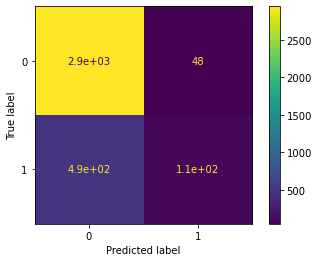

In [35]:
# Create a confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

### The confusion matrix above shows the following;
- 2900 True Negative Predictions: these are 0's predicted correctly, i.e correct predictions of employees who stayed.
- 490 False Negative Predictions: these are 1's wrongly predicted as 0's, .i.e employees who left wrongly predicted as to have stayed.
- 48 False Positive Predictions: these are 0's wrongly predicted as 1's, i.e employees who stayed wrongly predicted to have left.
- 110 True Positive Predictions: these are 1's predicted correctly, .i.e correct predictions of employees who left.
- The confusion matrix shows very poor predictions of employees who left by the model.

Given the models poor performance, it needs to be improved upon or a different modelling technique could be used to obtain a more better solution to the underlying problem.

### Improve Model's Performance

In [13]:
df['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

- The model above was predicting more of employees staying rather than employees who left. This may be due to the class imbalance of the output variable 'left'which is seen above (~83% the data is for employees who stayed, only ~17% of the data represents employees who left), this can be treated to see if it will help to improve the model'd performance.

#### Treat Class Imbalance using Sklearn

In [14]:
# Build and fit the model, set class weight to be balanced

clf_1 = LogisticRegression(class_weight='balanced').fit(X_train,y_train)

In [16]:
# Obtain parameter estimates
print('Coefficient:')
print(clf_1.coef_)

print('Intercept:')
print(clf_1.intercept_)

Coefficient:
[[ 0.55484716  0.00375145 -3.61678587]]
Intercept:
[0.97923033]


### Predict Outcome of Test Data

In [18]:
y_pred1 = clf_1.predict(X_test)
print(y_pred1)

[1 0 0 ... 0 1 0]


In [19]:
# Use predict_proba to output a probability.
clf_1.predict_proba(X_test)

array([[0.09048373, 0.90951627],
       [0.75388988, 0.24611012],
       [0.64570452, 0.35429548],
       ...,
       [0.58473119, 0.41526881],
       [0.25578079, 0.74421921],
       [0.63210212, 0.36789788]])

In [20]:
# Use predict to output 0's and 1's.

clf_1.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

#### Analyze the Model's Results

In [25]:
print('New Balanced model Scores')
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred1))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred1))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred1))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred1))

print()

print('Previous Model Scores')
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

New Balanced model Scores
Accuracy: 0.724013
Precision: 0.335025
Recall: 0.656716
F1 Score: 0.443697

Previous Model Scores
Accuracy: 0.850750
Precision: 0.703704
Recall: 0.189055
F1 Score: 0.298039


- The evaluation metrics scores of the new model adjusted for class imbalance has improved noticeably. The accuracy score decreased slightly but is still a good score, the recall score and F1 score have improved. The precision sore reduced considerably.

#### Produce a Confusion Matrix

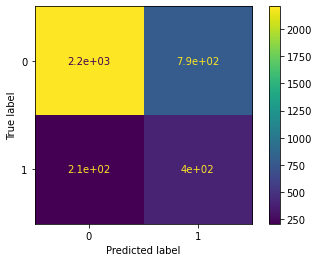

In [26]:
cm1 = metrics.confusion_matrix(y_test, y_pred1, labels = clf_1.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1,display_labels = clf_1.classes_)
disp.plot()

### The confusion matrix above shows the following;
- 2200 True Negative Predictions: these are 0's predicted correctly, i.e correct predictions of employees who stayed.
- 210 False Negative Predictions: these are 1's wrongly predicted as 0's, .i.e employees who left wrongly predicted as to have stayed.
- 790 False Positive Predictions: these are 0's wrongly predicted as 1's, i.e employees who stayed wrongly predicted to have left.
- 400 True Positive Predictions: these are 1's predicted correctly, .i.e correct predictions of employees who left.

**The confusion matrix shows improvement in the model's prediction of employees who left. Given that we are interested in predicting employees who leave, this model is a better predictor. However the evaluation metrics are not very good and shows room for improvement in the model, thus we will construct another model using random forest.**

## Construct a Random Forest Model

In [6]:
# Import packages
import pickle as pkl
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [7]:
# View data
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
# Convert categorical features to one-hot encoded features. Random forest requires categorical variables to be converted to numerical

df_dummies = pd.get_dummies(df, columns=['salary'])

In [9]:
# Convert categorical feature 'department' to numerical using one hot encoding.
# Note that dummies was not used because the department column has many categories and thus will lead to many dummy columns.

from sklearn.preprocessing import OneHotEncoder
df_dummies['department'] = OneHotEncoder(drop='first').fit_transform(df[['department']]).toarray()

In [10]:
df_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent,work_accident,left,promotion_last_5years,department,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0.0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0.0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0.0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0.0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0.0,0,1,0


### Model Building

In [11]:
# Separate the dataset into labels (y) and features (X).

y = df_dummies['left']
X = df_dummies.drop('left', axis=1)

In [12]:
# Separate into train, validate, test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

### Tune the Model

In [13]:
# Determine set of hyperparameters. Create a dictionary cv_paramsshowing hyperparameter values.

cv_params = {'n_estimators' : [50,200], 
              'max_depth' : [3,8],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

In [14]:
# Create list of split indices.
# Use list comprehension, iterating over the indices of X_train. 
# The list can consists of 0s to indicate data points that should be treated as validation data 
# and -1s to indicate data points that should be treated as training data.

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [15]:
# Instantiate model.

rf = RandomForestClassifier(random_state=0)

In [16]:
# Next, use GridSearchCV to search over the specified parameters.

# Search over specified parameters.

rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

In [17]:
%%time

# Fit the model.

rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


CPU times: user 308 ms, sys: 43.4 ms, total: 351 ms
Wall time: 5.97 s


[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    5.8s finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weigh...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, r

In [18]:
# Obtain optimal parameters.

rf_val.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [19]:
#Use the selected model to predict on test data. Use the optimal parameters found via GridSearchCV.

rf_opt = RandomForestClassifier(n_estimators = 50, max_depth = 8, 
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                max_features="sqrt", max_samples = 0.5, random_state = 0)

In [20]:
# Fit the optimal model.

rf_opt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=0.5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [21]:
# Predict on test set.

y_pred_rf = rf_opt.predict(X_test)

### Obtain Performance Scores

In [22]:
# Get precision score.

pc_test = precision_score(y_test, y_pred_rf)
print("The precision score is {pc:.3f}".format(pc = pc_test))

The precision score is 0.967


- The precision score shows that ~97% of the positive predictions are true positives.

In [27]:
# Get recall score score.

rc_test = recall_score(y_test, y_pred_rf)
print("The recall score is {rc:.3f}".format(rc = rc_test))

The recall score is 0.926


- The recall score shows that of all real positive cases in test set, ~93% are  predicted positive.

In [28]:
# Get accuracy score

ac_test = accuracy_score(y_test, y_pred_rf)
print("The accuracy score is {ac:.3f}".format(ac = ac_test))

The accuracy score is 0.983


- The accuracy score means of all cases in test set, ~98% are predicted true positive or true negative.

In [29]:
# Get f1 score

f1_test = f1_score(y_test, y_pred_rf)
print("The F1 score is {f1:.3f}".format(f1 = f1_test))

The F1 score is 0.946


-  The f1 score means the test set's harmonic mean is 95%.

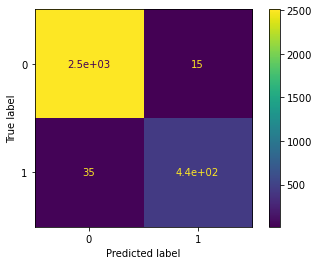

In [25]:
# Plot a confusion matrix

cm_rf = metrics.confusion_matrix(y_test, y_pred_rf, labels = rf_opt.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_rf,display_labels = rf_opt.classes_)
disp.plot()

#### The confusion matrix above shows the following;
- 2500 True Negative Predictions: these are 0's predicted correctly, i.e correct predictions of employees who stayed.
- 35 False Negative Predictions: these are 1's wrongly predicted as 0's, .i.e employees who left wrongly predicted as to have stayed.
- 15 False Positive Predictions: these are 0's wrongly predicted as 1's, i.e employees who stayed wrongly predicted to have left.
- 440 True Positive Predictions: these are 1's predicted correctly, .i.e correct predictions of employees who left.

#### The random forest model performed better in prediciton than the logistic regression model as seen from the metric evaluation scores and the confusion matrix.

### Build Feature Importance Graph

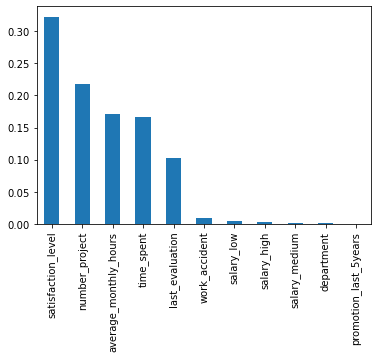

In [26]:
importances = rf_opt.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

- The features importance graph shows that **satisfaction level, number of project, average monthly hours, time spent and last evaluation** are the most important features for this model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression Model Result Interpretation**

Coefficient:

 Salary = 0.55484716  
 Average Monthly Hours = 0.00375145 
 Satisfaction Level = -3.61678587

Intercept:
[0.97923033]

- y = B0 + B1 + B2 + B3

Convert this by exponentiating the log odds of the coefficients;

- Model: Left = e^0.979 + (e^0.5548)*Salary + (e^0.00375)*Average_monthly_hours + (e^-3.6167)*Satisfaction_level

- **Model: Left = 2.66 + 0.74*Salary + 1.00*Average_monthly_hours + 0.03*Satisfaction_level**
- The model shows that for every one unit increase in salary while holding other variables constant, we expect employees turnover rate to increase by ~74%. For every one unit increase in average monthly hours while holding other variables constant, we expect employees turnover to increase by ~100%. And for every one unit increase in satisfaction level while holding other variables constant, we expect employee turnover to decrease by ~97% (1-0.03).


**Logistic Regression Model Performance**

Accuracy: 0.724013

Precision: 0.335025

Recall: 0.656716

F1 Score: 0.443697

- Based on the evaluation metric scores above, we can say the following; the model was ~72% accurate in its predictions, the recall score shows that the model accurately predicted ~66% of employees who left out of all employees who left. The precision score however is low and shows that only ~33% of the dependent variable 'left' are true. The f1 score is also shows low harmony for the precison and recall scores.


**Random Forest Model Result Evaluation**

Accuracy: 0.983

Precision: 0.967

Recall: 0.926

F1 Score: 0.946

- Based on the evaluation metrics scores, the random forest model did better. The confusion matrix also showed that the random forest model did better than the logistic regression model in classification. Based on the evaluation metric scores above, we can say the following; the model was ~98% accurate in its predictions, the recall score shows that the model accurately predicted ~93% of employees who left out of all employees who left. The precision score is good and shows that ~97% of the dependent variable 'left' are true. The f1 score is also shows good harmony for the precison and recall scores.

### Conclusion, Recommendations, Next Steps

- The random forest modelperformed better then the logistic regression model in classification and prediction.
- Based on the feature importance graph of the random forest model, we observed that employee satisfaction level, number of projects, avearge mothly hours, time spent and last evaluation were important features tied to employees turnover rate. The exploratory data analysis performed hinted that these features were indeed tied to employee turnover.
- Results of the analysis shows employees may be overworked, and dissatisfied with work or working condition. It was also observed that some employees who left had spent a good number of years with the company. 
- It is thus important to review company policies to see how to improve employee working condition  and increase employee loyalty. 
- It is also very important to reduce or limit workload assigned to employees and employee work hours as many employees who left had heavy workloads. Employees incentives should also be reviewed as many employees who left had spent a good number of years with the company.
- Deeper research or surveyes should be carried out to find out why employees are dissatified as many employees turnover was strongly tied to satisfaction level. 



**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.